In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolkit import filepath_to_csv, Orchids_filepath_to_csv

In [2]:
filepaths = [
    "round-2-island-data-bottle\prices_round_2_day_-1.csv",
    "round-2-island-data-bottle\prices_round_2_day_0.csv",
    "round-2-island-data-bottle\prices_round_2_day_1.csv",
]

dfs = []
for filepath in filepaths:
    df = Orchids_filepath_to_csv(filepath)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df['total_time'] = (df['DAY'] + 1)* 999901 + df['timestamp']
df.drop(['timestamp'], axis=1, inplace=True)
df

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_time
0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1,0
1,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1,100
2,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1,200
3,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1,300
4,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1,400
...,...,...,...,...,...,...,...,...
29998,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1,2999402
29999,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1,2999502
30000,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1,2999602
30001,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1,2999702


<Axes: xlabel='total_time'>

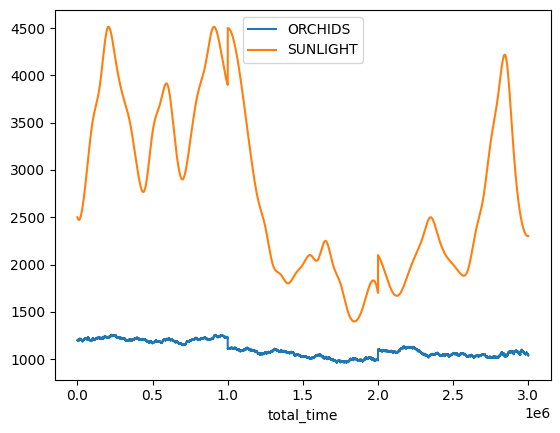

In [15]:
df[['ORCHIDS', 'SUNLIGHT', 'total_time']].plot(x='total_time')

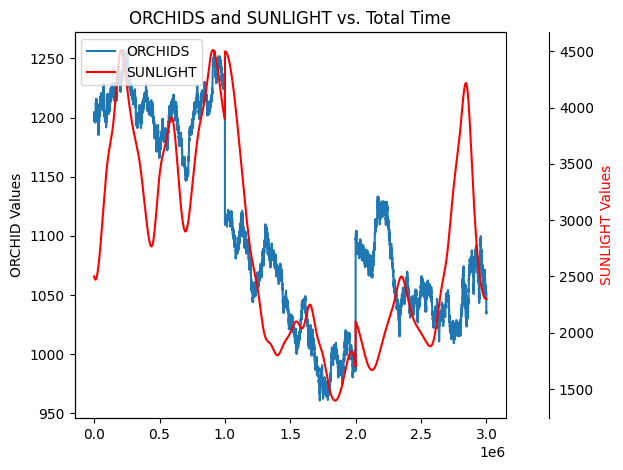

In [18]:
# Assuming df is your DataFrame
fig, ax = plt.subplots()  # Create a single plot

# Plot ORCHIDS on primary y-axis (left)
ax.plot(df['total_time'], df['ORCHIDS'], label='ORCHIDS')
ax.set_ylabel('ORCHID Values')

# Right-hand y-axis ticks (for SUNLIGHT)
ax2 = ax.twinx()
ax2.tick_params(axis='y', labelleft=False)  # Hide left-side ticks for SUNLIGHT
right_spine = ax2.spines['right']
right_spine.set_position(('axes', 1.1))  # Adjust right spine position

# Plot SUNLIGHT on secondary y-axis (right)
ax2.plot(df['total_time'], df['SUNLIGHT'], color='red', label='SUNLIGHT')
ax2.set_ylabel('SUNLIGHT Values', color='red')

# Labels and legend
plt.xlabel('Total Time')
plt.title('ORCHIDS and SUNLIGHT vs. Total Time')
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.tight_layout()
plt.show()

We need to fit splitting the data into days I think.

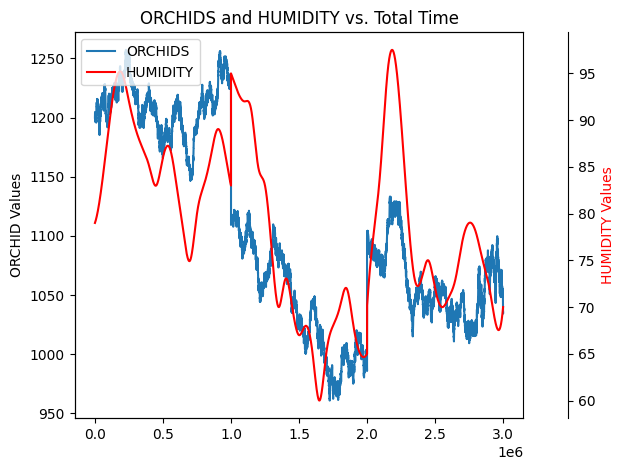

In [19]:
# Assuming df is your DataFrame
fig, ax = plt.subplots()  # Create a single plot

# Plot ORCHIDS on primary y-axis (left)
ax.plot(df['total_time'], df['ORCHIDS'], label='ORCHIDS')
ax.set_ylabel('ORCHID Values')

# Right-hand y-axis ticks (for SUNLIGHT)
ax2 = ax.twinx()
ax2.tick_params(axis='y', labelleft=False)  # Hide left-side ticks for SUNLIGHT
right_spine = ax2.spines['right']
right_spine.set_position(('axes', 1.1))  # Adjust right spine position

# Plot SUNLIGHT on secondary y-axis (right)
ax2.plot(df['total_time'], df['HUMIDITY'], color='red', label='HUMIDITY')
ax2.set_ylabel('HUMIDITY Values', color='red')

# Labels and legend
plt.xlabel('Total Time')
plt.title('ORCHIDS and HUMIDITY vs. Total Time')
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.tight_layout()
plt.show()